### Project: Write a Data Science Blog Post
### Part 1: Business Understanding
#### Brief Description
     Airbnb has become one of the most popular platforms to choose a dream vacation living place. 
     I used data from Kaggle Boston Airbnb Open Data to look at the questions as below. 
     Question 1: What are the top 5 factors that affect the listing price? 
     Question 2: What's the difference between superhost and regular host?
             2.1 Do super hosts respond faster than the regular host?
             2.2 Which amenities are more likely to be provided by the superhost vs. the regular host?
             2.3 Do the superhosts' review score is higher than the none superhost?
     Question 3: what are the top 10 expensive neighborhoods? 
### Part 2: Data Understanding
     2.1: Missing Value and data tpye Check
     2.2: Numerical Features Analysis
     2.3: Categorical Features Analysis
### Part 3: Prepare Data
     3.1: Response variables -- Outliner Treatment
     3.2: Numarical variables -- Multicollinearity Check
     3.3: Categorical variables -- relative analysis and dummy variables 
### Part 4: Data Modeling
     4.1: Generate test design
     4.2: Build the model
     4.3: Assess model
### Part 5: Evaluate Result

### Part 2: Data Understanting

In [1]:
# import the libaries needed in the project
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor #VIF Check

# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.19.1


#### Import Dataset

In [2]:
listings_raw = pd.read_csv('listings.csv', index_col = "id")

listings = listings_raw.copy()

In [3]:
listings.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,Please be mindful of the property as it is old...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",I have one roommate who lives on the lower lev...,...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


#### Data Szie Rows:3585, Columns:94

In [4]:
num_rows = listings.shape[0] #Provide the number of rows in the dataset
num_cols = listings.shape[1] #Provide the number of columns in the dataset

In [5]:
num_rows

3585

In [6]:
num_cols

94

### Step2.1.1: Missing Value data check
#### 50 variables has no missing value

In [7]:
no_nulls = set(listings.columns[~listings.isnull().any()])
len(no_nulls)

50

#### 9 Variables has more than half missing value

In [8]:
most_missing_cols = set(listings.columns[listings.isnull().mean() > 0.50])
most_missing_cols

{'has_availability',
 'jurisdiction_names',
 'license',
 'monthly_price',
 'neighbourhood_group_cleansed',
 'notes',
 'security_deposit',
 'square_feet',
 'weekly_price'}

### Step2.1.2:Data Type check

In [9]:
# Summary:
#1. 4 varialbes have 0 non-null value (neighbourhood_group_cleansed,has_availability,license,jurisdiction_names)
#2. Some columns relative to $ need to change to number data tpye
#3. Some columns can be removed from the data like, listing_url,scrape_id,last_scraped
#4. 'host_response_rate', 'host_acceptance_rate' should be changed to float
print(listings.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 12147973 to 14504422
Data columns (total 94 columns):
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986 non-null object
medium_url                  

#### Step2.1.2:Numarical data type check ( Remember check the range)
**1.** Variables scrape_id', 'host_id','jurisdiction_names'are not useful for model building

**2.** Variables maximum_nights and availability_365 have high standard diviation which will afact the model accuracy. 

In [10]:
num_vars = listings.select_dtypes(include=['float', 'int']).columns
num_vars

Index(['scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'guests_included', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'jurisdiction_names',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [11]:
# Variables maximum_nights and availability_365 have high standard diviation
pd.set_option('display.max_columns', None)
listings.select_dtypes(include=['float', 'int']).describe()

,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,56.000000,3585.000000,3585.000000,3.585000e+03,0.0,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,1.255944,1.609060,858.464286,1.429847,3.171269,2.872584e+04,NaN,8.64993,21.833194,38.558159,179.346444,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,0.000000e+00,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,0.753060,1.011745,608.874310,1.056787,8.874133,1.670136e+06,NaN,10.43533,21.860966,33.158272,142.136180,35.571658,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,415.000000,1.000000,1.000000,3.650000e+02,NaN,0.00000,0.000000,0.000000,19.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,825.000000,1.000000,2.000000,1.125000e+03,NaN,4.00000,16.000000,37.000000,179.000000,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,1200.000000,1.000000,3.000000,1.125000e+03,NaN,15.00000,40.000000,68.000000,325.000000,21.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,2400.000000,14.000000,300.000000,1.000000e+08,NaN,30.00000,60.000000,90.000000,365.000000,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [12]:
cat_vars = listings.select_dtypes(include=['object']).columns
cat_vars

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'extra_people', 'calendar_updated',
       'calendar_last_scraped', 'first_rev

#### Data Cleanning
**1**. Delete the variables have no help in model building

**2**. Delete the variables have all null value and missing value more than 50%

**3**. Change'price', 'weekly_price', 'monthly_price','security_deposit', 'cleaning_fee'into float data tpye

**4**. Count how many days since the date

**5**. Count the items in'amenities'and 'host_verifications'

**6**. Fill the numarical missing value with mean

In [13]:
def clean_dataset (df, no_usage,response_variable,Money_Variable,Transfer_Variables,Time_Length,till_date,count_items):
    '''
    INPUT:
    df - pandas dataframe you want to clean
    no_usage - list of clolumns name you want to delete
    response_variable - the variable you want to predict
    Money_Variable - list of columns have $ sign
    Transfer_Variables - list of variables contain %
    Time_Length - list of variables you want to calculate how many days untill the till data
    till_date - The end day of your calculation
    count_items -list of columns have multiple answers in a question with , to seperate them
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
    1. without no usage columns
    2. variables contain $ and % sign will change to float
    3. calculate the number of days since one specific day
    4. count the number of answers within the multiple choice question
    5. the numarical missing value has been fill with mean
    '''
      
    #1 Delete the variables have no help in model building
    drop_no_usage= df.drop(no_usage, axis=1) 

    #1.1 drop the rows has missing value in the respones variable
    MissY_drop = drop_no_usage.dropna(subset=[response_variable],axis=0) 

    #1.2 delete the cloumns have missing value more than 0.5
    nan_cols = MissY_drop.columns[MissY_drop.isnull().mean() > 0.50]
    df_dropna = MissY_drop.drop(nan_cols, axis=1) 

    #3.1 Change $  into float
    for col in Money_Variable:
        # remove $ and comma from price, ignore na values so that we wont get any errors.
        df_dropna[col] = df_dropna[col].map(lambda p : p.replace('$','').replace(',',''), na_action='ignore')
        # convert cols to float type
        df_dropna[col] = df_dropna[col].astype(float)

    #3.2 Change %  into float
    for col in Transfer_Variables:
        df_dropna[col] = df_dropna[col].str.extract(r'(\d+)')
        df_dropna[col] = df_dropna[col].astype('float')
        
    #4. Count how many days since the date
    df_dropna[Time_Length] = pd.to_datetime(df_dropna[Time_Length])
    temp = pd.to_datetime(till_date)

    df_dropna['host_len'] = df_dropna.host_since.apply(lambda x: pd.Timedelta(temp-x).days)
    df_dropna = df_dropna.drop(Time_Length, axis=1)

    #5. Extract the number of item in one cell
    for col in count_items:
        df_dropna[col] = df_dropna[col].apply(lambda x: len(x.replace('{', '').\
                        replace('{', '').replace('"', '').split(',')))
  
    #6. fill numarical missing value with mean
    # Most of the missing values are about the characters of a proporty
    # the missing data didn't have time-series problem,they are gneral problem (Continuous), 
    # so I fill missing with mean
    num_vars = df_dropna.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df_dropna[col].fillna((df_dropna[col].mean()), inplace=True)
        
    x=df_dropna
    return x

In [14]:
no_usage= ['scrape_id', 'host_id','listing_url', 'last_scraped', 'name', 'summary', 'space', 
           'description', 'experiences_offered', 'neighborhood_overview', 'transit', 'access', 'interaction', 
           'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name', 
           'host_location', 'host_about','state','market', 'smart_location', 'country_code', 'country',
           'calendar_updated','calendar_last_scraped', 'first_review', 'last_review','host_thumbnail_url', 'host_picture_url']

response_variable = 'price'

Money_Variable = ["cleaning_fee", "price", "extra_people"]

Transfer_Variables= ['host_response_rate', 'host_acceptance_rate']

Time_Length='host_since'

till_date='08/03/2021'

count_items=['amenities','host_verifications']


x1=clean_dataset (listings,no_usage, response_variable, Money_Variable,Transfer_Variables,Time_Length,till_date,count_items)

### Step2.2:Numerical Features Analysis

#### Correlation matrix Summary
**1**. accommodates,beds,bedrooms,cleaning_fee are high correlative with price

**2**. avaliability_30,60,90, host_listing count,host_total_listing count are highly correlative

**3**. accommodateds are highlly correlative with beds,bedrooms,bathroom,cleening fee, gust_inluded

**4**. guest include is highly correlative with extra_people

**5**. number of review is highly correlative with reviews per month

**6**. review relative variables are highly corelative.

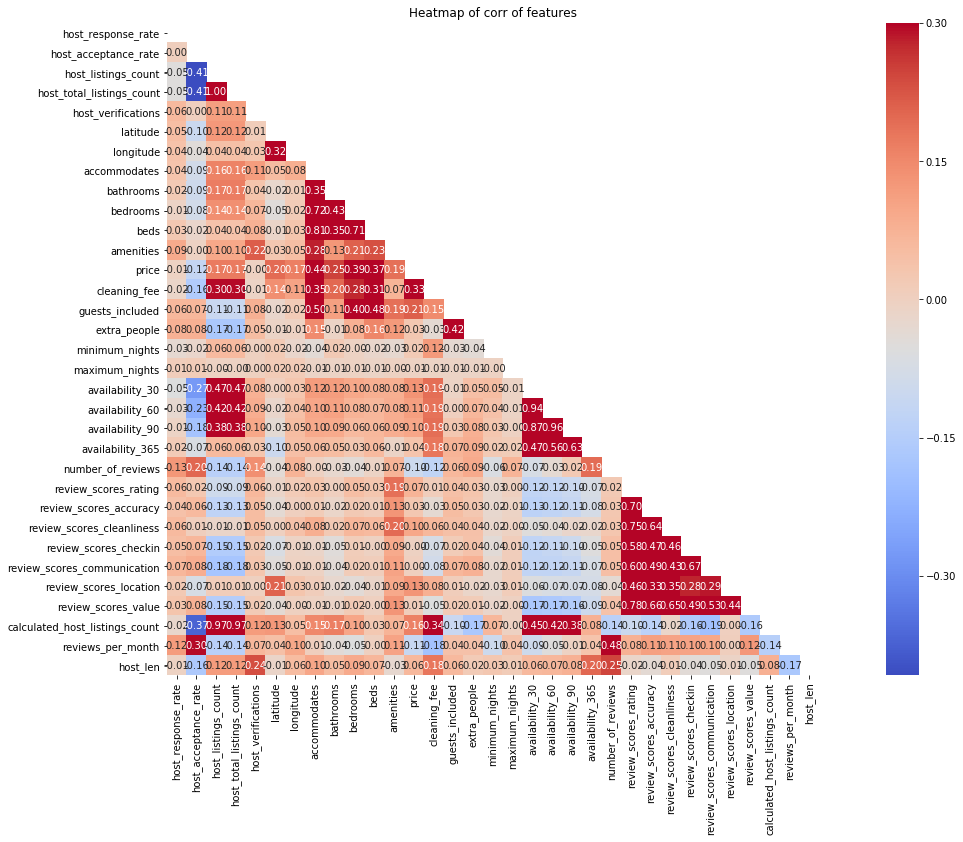

In [15]:
corrlation = x1.select_dtypes(include=['int64', 'float64']).corr()
mask = np.zeros_like(corrlation)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(24,12))
plt.title('Heatmap of corr of features')
sns.heatmap(corrlation, mask = mask, vmax=.3, square=True, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

#### Step2.3: Deal with the categorical Variables

In [16]:
# Check the categorical variables again
x1.select_dtypes(include=['object']).columns

Index(['host_response_time', 'host_is_superhost', 'host_neighbourhood',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'zipcode',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'requires_license', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')

#### Categorical data type check summary
**1**. 'listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about','state','market', 'smart_location', 'country_code', 'country','calendar_updated','calendar_last_scraped', 'first_review', 'last_review',
       are not useful for model building
       
**2**.'price', 'weekly_price', 'monthly_price','security_deposit', 'cleaning_fee'should be changed to float

**3**. the number of items should be counted in 'amenities'and 'host_verifications'

#### Summary:The price among zip code, neighbourhood ,property_type, room_type,require_guest_phone_verification,bed_type have obvious price difference

In [17]:
# a large gap among different zipcode
x1.groupby(['zipcode']).mean()['price'].sort_values().dropna()

zipcode
02169           25.000000
02186           50.000000
02472           60.000000
02134-1704      80.000000
02467           80.400000
02126           80.958333
02124           81.200000
02163           86.666667
02136           88.793103
02145           89.833333
02445           92.800000
02125           95.527132
02143           95.571429
02131           96.907692
02121          101.310345
02132          103.783784
02134          108.836207
02122          114.409091
02128          119.684932
02135          120.395349
02119          126.110000
02120          126.173913
02130          138.746224
02141          150.000000
02218          169.000000
02446          178.500000
02127          189.938889
02113          190.158416
02139          190.166667
02115          195.065089
02114          213.238095
02118          217.789474
02138          221.500000
02129          221.844444
02215          225.546610
02116          229.180412
02108          230.361111
02109          238.941176
0211

In [18]:
# no obvious differences are observed
x1.groupby(['is_location_exact']).mean()['price'].sort_values().dropna()

is_location_exact
f    149.609901
t    177.912662
Name: price, dtype: float64

In [19]:
# a large gap among different property type
x1.groupby(['property_type']).mean()['price'].sort_values().dropna()

property_type
Camper/RV           60.000000
Dorm                62.500000
Entire Floor       122.000000
Bed & Breakfast    129.365854
House              131.599644
Townhouse          149.037037
Apartment          181.966692
Loft               185.410256
Villa              189.500000
Condominium        190.246753
Other              229.941176
Boat               268.833333
Guesthouse         289.000000
Name: price, dtype: float64

In [20]:
# a large gap among entire home/apt and other room type
x1.groupby(['room_type']).mean()['price'].sort_values().dropna()

room_type
Shared room         92.762500
Private room        96.041364
Entire home/apt    227.436765
Name: price, dtype: float64

In [21]:
x1.groupby(['requires_license']).mean()['price'].sort_values().dropna()

requires_license
f    173.925802
Name: price, dtype: float64

In [22]:
# no obvious differences are observed
x1.groupby(['instant_bookable']).mean()['price'].sort_values().dropna()

instant_bookable
t    154.836700
f    177.716817
Name: price, dtype: float64

In [23]:
# a large gap among different cancellation_policy
x1.groupby(['cancellation_policy']).mean()['price'].sort_values().dropna()

cancellation_policy
flexible           148.908909
moderate           162.620239
strict             188.219975
super_strict_30    324.141176
Name: price, dtype: float64

In [24]:
# no obvious differences are observed
x1.groupby(['require_guest_profile_picture']).mean()['price'].sort_values().dropna()

require_guest_profile_picture
t    158.552239
f    174.218590
Name: price, dtype: float64

In [25]:
# a large gap between require_guest_phone_verification
x1.groupby(['require_guest_phone_verification']).mean()['price'].sort_values().dropna()

require_guest_phone_verification
f    168.601553
t    249.139241
Name: price, dtype: float64

In [26]:
# no obvious differences are observed
x1.groupby(['host_is_superhost']).mean()['price'].sort_values().dropna()

host_is_superhost
f    173.604468
t    176.434889
Name: price, dtype: float64

In [27]:
# a large gap among different host_response_time
x1.groupby(['host_response_time']).mean()['price'].sort_values().dropna()

host_response_time
a few days or more    150.627907
within a day          155.127932
within an hour        160.638728
within a few hours    190.050082
Name: price, dtype: float64

In [28]:
# no obvious differences are observed
x1.groupby(['host_has_profile_pic']).mean()['price'].sort_values().dropna()

host_has_profile_pic
f    171.125000
t    173.932066
Name: price, dtype: float64

In [29]:
# no obvious differences are observed
x1.groupby(['host_identity_verified']).mean()['price'].sort_values().dropna()

host_identity_verified
f    173.428717
t    174.113331
Name: price, dtype: float64

In [30]:
# no obvious differences are observed
x1.groupby(['bed_type']).mean()['price'].sort_values().dropna()

bed_type
Airbed            78.675000
Futon             85.254902
Couch             99.600000
Pull-out Sofa    101.612903
Real Bed         177.203301
Name: price, dtype: float64

In [31]:
# a large gap among different neighbourhood_cleansed
x1.groupby(['neighbourhood_cleansed']).mean()['price'].sort_values().dropna()

neighbourhood_cleansed
Mattapan                    75.125000
Hyde Park                   86.548387
Dorchester                  91.639405
Roslindale                  98.428571
West Roxbury               107.108696
Allston                    112.307692
Brighton                   118.767568
East Boston                119.153333
Mission Hill               121.967742
Longwood Medical Area      138.444444
Jamaica Plain              138.478134
Roxbury                    146.333333
South Boston               187.609195
North End                  195.678322
Charlestown                198.045045
South End                  204.349693
West End                   209.591837
Fenway                     220.393103
Beacon Hill                224.443299
Chinatown                  232.352113
Downtown                   236.459302
Back Bay                   240.950331
Leather District           253.600000
Bay Village                266.833333
South Boston Waterfront    306.060241
Name: price, dtype: float64

In [32]:
# no obvious differences are observed
x1.groupby(['host_identity_verified']).mean()['price'].sort_values().dropna()

host_identity_verified
f    173.428717
t    174.113331
Name: price, dtype: float64

In [33]:
# no obvious differences are observed
x1.groupby(['host_has_profile_pic']).mean()['price'].sort_values().dropna()

host_has_profile_pic
f    171.125000
t    173.932066
Name: price, dtype: float64

In [34]:
# no obvious differences are observed
x1.groupby(['host_is_superhost']).mean()['price'].sort_values().dropna()

host_is_superhost
f    173.604468
t    176.434889
Name: price, dtype: float64

### Part3: Prepard data for model building
#### Step3.1: Response variables -- Outliner Treatment

#### Response variable -- Outliner Treatment

In [35]:
# The min value is 10 seems problematic
print(x1['price'].describe())

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64


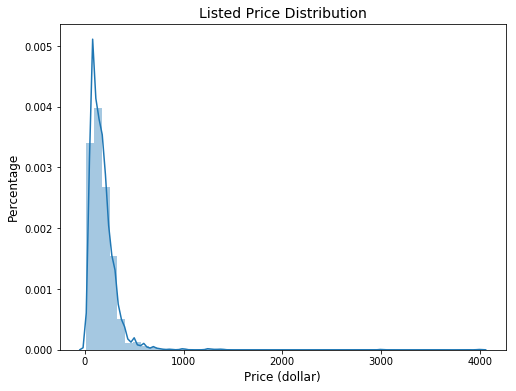

In [36]:
# visualizae the price
# the data skew to the right
plt.figure(figsize=(8, 6))
sns.distplot(x1['price'], bins=50, kde=True)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Price (dollar)', fontsize=12)
plt.title('Listed Price Distribution', fontsize=14);

#### The response variable skew to the right, it seems like a lot of outliners there

In [37]:
# remove outliers
#Calculate the outliners Q2 + 1.5*IRQ
#Outliner_right= 220+1.5* (220-85) =423
x2 = x1[x1['price'] < 423]
x2.shape

(3461, 52)

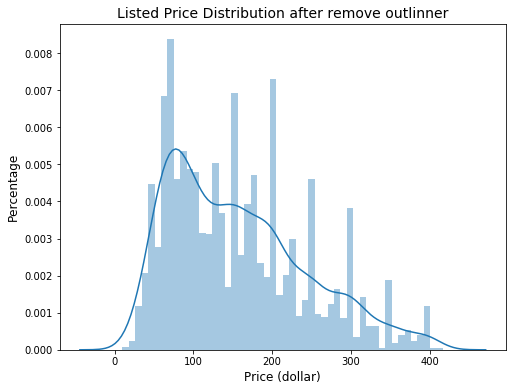

In [38]:
plt.figure(figsize=(8, 6))
sns.distplot(x2['price'], bins=50, kde=True)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Price (dollar)', fontsize=12)
plt.title('Listed Price Distribution after remove outlinner', fontsize=14);

After removing the outlinner, the shape of the response variables seems more reasonable. 

####  Step3.2: Numarical variables -- Multicollinearity Check_Choose numarical variables
From the correlation matrix we know that the metrics about the availability, review score and room characters are highly correlative, if we want our model more statble we can check the VIF

In [39]:
def calc_vif(X):
    '''
    Input:
    a list of column names you want to check the VIF
    Output:
    The VIF values for the chosen variables
    '''
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [40]:
# Most of the variables have high VIF
# Review Score and availability relative variable has very high VIF indicting that they will doing the same job in the model
X_VIF = x2.select_dtypes(include=['int64', 'float64']).drop(['price'], axis=1)
calc_vif(X_VIF)

/opt/conda/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,host_response_rate,7.303516e+01
1,host_acceptance_rate,2.507182e+01
2,host_listings_count,inf
3,host_total_listings_count,inf
4,host_verifications,2.313265e+01
5,latitude,1.597643e+06
6,longitude,1.596437e+06
7,accommodates,1.518442e+01
8,bathrooms,9.102632e+00
9,bedrooms,9.814910e+00


In [41]:
# After trying many combination, I found that this combination is in a good balance.
VIF_test_col =[ 'bathrooms','cleaning_fee','guests_included', 'minimum_nights',
               'number_of_reviews','reviews_per_month','host_listings_count',
              'amenities','extra_people','availability_30','accommodates']
X_vif= x2[VIF_test_col]
calc_vif(X_vif)

,variables,VIF
0,bathrooms,6.526098
1,cleaning_fee,4.164937
2,guests_included,4.758028
3,minimum_nights,1.169591
4,number_of_reviews,1.701724
5,reviews_per_month,2.742694
6,host_listings_count,1.684013
7,amenities,8.238251
8,extra_people,1.686947
9,availability_30,2.213250


#### Step3.3: Categorical variables -- relative analysis and dummy variables 

In [42]:
# Create a new data frame with the choosen categorical and numarical variables
clean_data= x2[[ 'property_type', 'room_type','require_guest_phone_verification','bed_type','bathrooms',
       'cleaning_fee','guests_included', 'minimum_nights','number_of_reviews','reviews_per_month',
       'host_listings_count','amenities','extra_people','availability_30','accommodates','price']]
clean_data.head()

,property_type,room_type,require_guest_phone_verification,bed_type,bathrooms,cleaning_fee,guests_included,minimum_nights,number_of_reviews,reviews_per_month,host_listings_count,amenities,extra_people,availability_30,accommodates,price
id,,,,,,,,,,,,,,,,
12147973,House,Entire home/apt,f,Real Bed,1.5,35.000000,1,2,0,1.970908,1,15,0.0,0,4,250.0
3075044,Apartment,Private room,f,Real Bed,1.0,10.000000,0,2,36,1.300000,1,21,0.0,26,2,65.0
6976,Apartment,Private room,f,Real Bed,1.0,68.380145,1,3,41,0.470000,1,18,20.0,19,2,65.0
1436513,House,Private room,f,Real Bed,1.0,50.000000,2,1,1,1.000000,1,23,25.0,6,4,75.0
7651065,House,Private room,f,Real Bed,1.5,15.000000,1,2,29,2.250000,1,14,0.0,13,2,79.0


In [43]:
#Pull a list of the column names of the categorical variables

def create_dummy_df(df, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values, if fasle fill 00
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for col in  cat_vars:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [44]:
proccessed_data=create_dummy_df(clean_data, dummy_na =True)
proccessed_data.head()

,bathrooms,cleaning_fee,guests_included,minimum_nights,number_of_reviews,reviews_per_month,host_listings_count,amenities,extra_people,availability_30,accommodates,price,property_type_Bed & Breakfast,property_type_Boat,property_type_Camper/RV,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa,property_type_nan,room_type_Private room,room_type_Shared room,room_type_nan,require_guest_phone_verification_t,require_guest_phone_verification_nan,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12147973,1.5,35.000000,1,2,0,1.970908,1,15,0.0,0,4,250.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3075044,1.0,10.000000,0,2,36,1.300000,1,21,0.0,26,2,65.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
6976,1.0,68.380145,1,3,41,0.470000,1,18,20.0,19,2,65.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1436513,1.0,50.000000,2,1,1,1.000000,1,23,25.0,6,4,75.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7651065,1.5,15.000000,1,2,29,2.250000,1,14,0.0,13,2,79.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [45]:
list(proccessed_data.columns)

['bathrooms',
 'cleaning_fee',
 'guests_included',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'host_listings_count',
 'amenities',
 'extra_people',
 'availability_30',
 'accommodates',
 'price',
 'property_type_Bed & Breakfast',
 'property_type_Boat',
 'property_type_Camper/RV',
 'property_type_Condominium',
 'property_type_Dorm',
 'property_type_Entire Floor',
 'property_type_Guesthouse',
 'property_type_House',
 'property_type_Loft',
 'property_type_Other',
 'property_type_Townhouse',
 'property_type_Villa',
 'property_type_nan',
 'room_type_Private room',
 'room_type_Shared room',
 'room_type_nan',
 'require_guest_phone_verification_t',
 'require_guest_phone_verification_nan',
 'bed_type_Couch',
 'bed_type_Futon',
 'bed_type_Pull-out Sofa',
 'bed_type_Real Bed',
 'bed_type_nan']

### Part 4: Data Modeling 
#### 4.1&4.2: Build linner regression modle

In [46]:
#Split into explanatory and response variables
y_raw = proccessed_data['price'].astype(int)
x_raw= proccessed_data.drop(['price'],axis=1)
#Split into train and test
X1_train, X1_test, y1_train, y1_test = train_test_split(x_raw, y_raw, test_size = .30, random_state=42)
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X1_train, y1_train) #Fit

#Predict and score the model
y_test_preds = lm_model.predict(X1_test) 
y_train_preds = lm_model.predict(X1_train) 

#### 4.3 Access the model

In [47]:
#Rsquared and y_test
rsquared_score = r2_score(y1_test, y_test_preds)#r2_score
length_y_test = len(y1_test)#num in y_test

train_score = r2_score(y1_train, y_train_preds)

# Mean Square erro check
MSE = mean_squared_error(y1_train,y_train_preds)

"The r-squared score for your model was {} on {} values,MSE was{} .".format(rsquared_score, length_y_test,MSE)

'The r-squared score for your model was 0.5636423810256017 on 1039 values,MSE was3157.19387898276 .'

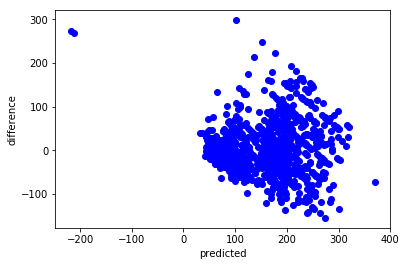

In [48]:
# residual check
y_test_preds = lm_model.predict(X1_test)

preds_vs_act = pd.DataFrame(np.hstack([y1_test.values.reshape(y1_test.size,1), y_test_preds.reshape(y1_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']

plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

The residual distribution looks like a fan, we have 2 point has a big difference at prices 55 and 58

In [49]:
preds_vs_act[preds_vs_act.preds <0]

,actual,preds,diff
454,58.0,-210.955524,268.955524
758,55.0,-218.342295,273.342295


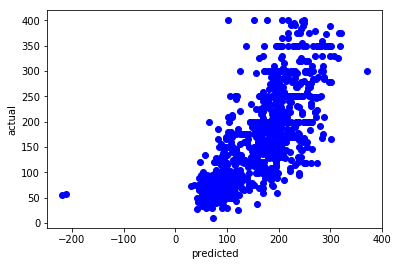

In [50]:
plt.plot(preds_vs_act['preds'], preds_vs_act['actual'], 'bo');
plt.xlabel('predicted');
plt.ylabel('actual'); #there appears a slight positive trend 

The residual seems didn't spread evenly, Let's use Log method to build the model again

In [51]:
# log the response variable
#Split into explanatory and response variables
y2_raw = np.log2(proccessed_data['price'].astype(int)) ## log the response variable
x2_raw= proccessed_data.drop(['price'],axis=1)
#Split into train and test
X2_train, X2_test, y2_train, y2_test = train_test_split(x2_raw, y2_raw, test_size = .30, random_state=42)
lm_model2 = LinearRegression(normalize=True) # Instantiate
lm_model2.fit(X2_train, y2_train) #Fit

#Predict and score the model
y2_test_preds = lm_model2.predict(X2_test) 
y2_train_preds = lm_model2.predict(X2_train) 

#Rsquared and y_test
rsquared_score_2 = r2_score(y2_test, y2_test_preds)#r2_score
length_y2_test = len(y2_test)#num in y_test

train_score_2 = r2_score(y2_train, y2_train_preds)

"The r-squared score for your model was {} on {} values,train set r-squared was{} .".format(rsquared_score_2, length_y2_test,train_score_2)

'The r-squared score for your model was 0.6085304822061139 on 1039 values,train set r-squared was0.6102166314393033 .'

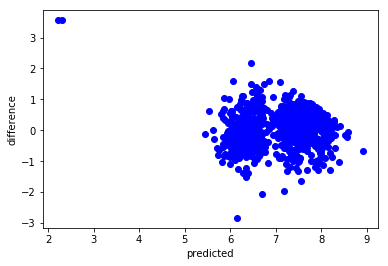

In [52]:
# residual check after log--It seems like the residual spreed more evenly
y2_test_preds = lm_model2.predict(X2_test)

preds_vs_act2 = pd.DataFrame(np.hstack([y2_test.values.reshape(y2_test.size,1), y2_test_preds.reshape(y2_test.size,1)]))
preds_vs_act2.columns = ['actual', 'preds']
preds_vs_act2['diff'] = preds_vs_act2['actual'] - preds_vs_act2['preds']

plt.plot(preds_vs_act2['preds'], preds_vs_act2['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

### Part5: Evaluate the result
#### Question 1: What's the top 5 factors afact the listing price?
Variables room type,property_type,bed_type,property_type_Bed & Breakfast,require_guest_phone_verification_t,accommodates afact the price most.

In [53]:

def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model2.coef_, X2_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
20,property_type_Other,86.469578,86.469578
25,room_type_Shared room,-83.554853,83.554853
17,property_type_Guesthouse,79.891421,79.891421
24,room_type_Private room,-68.726729,68.726729
22,property_type_Villa,62.362952,62.362952
27,require_guest_phone_verification_t,43.951819,43.951819
16,property_type_Entire Floor,-36.474336,36.474336
15,property_type_Dorm,-35.925553,35.925553
11,property_type_Bed & Breakfast,22.957036,22.957036
30,bed_type_Futon,-19.392101,19.392101


#### Question 2: What's the difference between superhost and regular host?
#### 2.1 Do super hosts respond faster than the regular host?
#### Yes, Supperhost did response faster than the none super host

In [54]:
# Supperhost did respond faster than the regular host
# None of the superhost response in a few days or more
response_time_superhost=pd.crosstab(listings.host_response_time, listings.host_is_superhost)
response_time_superhost/response_time_superhost.sum()

host_is_superhost,f,t
host_response_time,,
a few days or more,0.015855,0.000000
within a day,0.160029,0.087065
within a few hours,0.396755,0.353234
within an hour,0.427360,0.559701


#### 2.2 Which amenities are more likely to be provided by the superhost vs. the regular host?

In [55]:
# Check the options in the answer
listings['amenities'].value_counts()

{}                                                                                                                                                                                                                                                                                                                                                                                   32
{TV,"Cable TV","Wireless Internet","Air Conditioning",Kitchen,Heating,Washer,Dryer,"translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}                                                                                                                                                                                                        15
{TV,"Cable TV","Wireless Internet","Air Conditioning",Kitchen,Heating,Washer,Dryer,"Smoke Detector","Fire Extinguisher","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}                                      

In [56]:
# Create a function to count the number of elements in one option
def total_count (df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]
    OUTPUT:
    new_df - a datafram of each look_for with the count of how often it shows up
    '''
    from collections import defaultdict
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range (df.shape[0]):
            if val in df[col1][idx]:
                new_df[val]+= int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns =[col1,col2]
    new_df.sort_values('count',ascending= False, inplace= True)
    return new_df

In [57]:
def clean_and_plot(df,variable,title, plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    
    option_raw = df[variable].value_counts().reset_index()
    option_raw.rename(columns={'index': 'method', variable: 'count'}, inplace=True)
    option_new = total_count(option_raw, 'method', 'count', possible_vals)

    option_new.set_index('method', inplace=True)
    if plot:
        (option_new/df.shape[0]).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_df = option_new/df.shape[0]
    return props_df

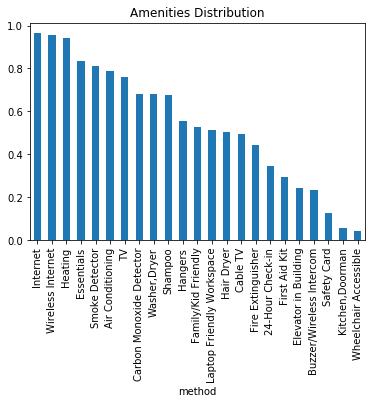

In [58]:
possible_vals =["TV","Cable TV","Internet","Wireless Internet","Air Conditioning","Wheelchair Accessible",
                "Kitchen,Doorman","Elevator in Building","Buzzer/Wireless Intercom","Heating","Family/Kid Friendly",
                "Washer,Dryer","Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Safety Card",
                "Fire Extinguisher","Essentials","Shampoo","24-Hour Check-in","Hangers","Hair Dryer",
                "Laptop Friendly Workspace"]

props_df = clean_and_plot(listings,'amenities','Amenities Distribution')

#### Internet is the most popular amenities, while wheelchair Accessible is provided by least of the house owner

In [59]:
# Check the distribution of superhost & regular host, only 407 of them are superhost
superhost_or_not=listings.host_is_superhost.value_counts()
superhost_or_not

f    3178
t     407
Name: host_is_superhost, dtype: int64

In [60]:
# Create a funtion to transfer true or false into 1 and 0
def superhost_or_not(formal_ed_str):
    '''
    Input:
    formal_ed_str:column name you want to transfer
    output:
    if the value is "t", it will be  transfer to 1, else will be 0
    
    '''
    if formal_ed_str in("t"):
        return (1)
    else:
        return (0)

In [61]:
#Test your function to assure it provides 1 and 0 values for the df
listings["host_is_superhost"].apply(superhost_or_not)[:5]

id
12147973    0
3075044     0
6976        1
1436513     0
7651065     1
Name: host_is_superhost, dtype: int64

In [62]:
# Create a new cloumn call super host
listings['Superhost'] = listings["host_is_superhost"].apply(superhost_or_not)

In [63]:
ed_1 = listings[listings['Superhost']== 1] # Subset df to only those with HigherEd of 1
ed_0 = listings[listings['Superhost']== 0] # Subset df to only those with HigherEd of 0
print(ed_1['Superhost'][:5]) # validation
print(ed_0['Superhost'][:5]) # validation

id
6976        1
7651065     1
12386020    1
2843445     1
753446      1
Name: Superhost, dtype: int64
id
12147973    0
3075044     0
1436513     0
5706985     0
12023024    0
Name: Superhost, dtype: int64


In [64]:
ed_1_perc = clean_and_plot(ed_1,'amenities','Superhost',plot=False) # apply the funtion clean_and_plot for Superhost
ed_0_perc = clean_and_plot(ed_0,'amenities','Normal',plot=False) # apply the funtion clean_and_plot for regular host

In [65]:
comp_df = pd.merge(ed_1_perc, ed_0_perc, left_index=True, right_index=True) # merge superhosst and 
comp_df.columns = ['Superhost', 'Regular_host']
comp_df['Diff_HigherEd_Vals'] = comp_df['Superhost'] - comp_df['Regular_host']
comp_df.style.bar(subset=['Diff_HigherEd_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])

,Superhost,Regular_host,Diff_HigherEd_Vals
method,,,
Internet,0.987715,0.961926,0.0257892
Wireless Internet,0.987715,0.949969,0.0377465
Heating,0.980344,0.93927,0.041074
Essentials,0.938575,0.821901,0.116674
Smoke Detector,0.928747,0.797042,0.131705
Shampoo,0.867322,0.650724,0.216598
Air Conditioning,0.864865,0.776904,0.0879612
Carbon Monoxide Detector,0.842752,0.660478,0.182274
TV,0.764128,0.759597,0.00453053


If you choose Super host, you will be more likely to get Shampoo,First Aid Kit,Carbon Monoxide Detector than the none superhost

#### 2.3 Do the superhosts' review score is higher than the none superhost?

In [66]:
listings.groupby("Superhost", as_index=True)['review_scores_rating','review_scores_accuracy','review_scores_checkin', 
                                       'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                                       'review_scores_location','review_scores_value'].mean() 

,review_scores_rating,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
Superhost,,,,,,,,
0,91.061817,9.353314,9.595529,9.162663,9.595529,9.594185,9.380751,9.076371
1,97.076142,9.903308,9.951777,9.832487,9.951777,9.961929,9.614213,9.720812


The superhost's satisfaction is higher than the regular host, especially in value and cleanliness.

#### Question 3: what are the top 10 expensive neighborhoods? 

In [67]:
x1.groupby(['neighbourhood_cleansed']).mean()['price'].sort_values().dropna()

neighbourhood_cleansed
Mattapan                    75.125000
Hyde Park                   86.548387
Dorchester                  91.639405
Roslindale                  98.428571
West Roxbury               107.108696
Allston                    112.307692
Brighton                   118.767568
East Boston                119.153333
Mission Hill               121.967742
Longwood Medical Area      138.444444
Jamaica Plain              138.478134
Roxbury                    146.333333
South Boston               187.609195
North End                  195.678322
Charlestown                198.045045
South End                  204.349693
West End                   209.591837
Fenway                     220.393103
Beacon Hill                224.443299
Chinatown                  232.352113
Downtown                   236.459302
Back Bay                   240.950331
Leather District           253.600000
Bay Village                266.833333
South Boston Waterfront    306.060241
Name: price, dtype: float64

Downtown,Beacon Hill,Back Bay,South End,North End,South Boston Waterfront,Leather District,
South Boston,West End,Fenway is the top 10 expensive neighbourhood